## EXPLOITING HIGHER MODES

QuLTRA simulations allow the CPWs to be exploited in their entirety, including the utilization of their higher-order resonant modes. To illustrate this approach, we consider a qubit coupled to a resonator designed such that one of its admittance pole lies at the qubit frequency, while the resonator’s second-order mode is used for readout.

Suppose the qubit has a frequency of around 6 GHz and an anharmonicity of 200 MHz. In order to have an admittance pole at the qubit frequency, the λ/4 resonator should be 9.8 mm longer

In [ ]:
import numpy as np
import qultra as qu

e = 1.60217657e-19  # electron charge
h = 6.62606957e-34  # Plank's

fq=6e9
alpha=200e6

Cj=e**2/2/h/alpha #qubit capacitance given the anharmonicity constraint
Lj=1/Cj/(2*np.pi*fq)**2 # qubit inductance given the qubit frequency
Cg=20e-15 #coupling capacitance
l=9.8e-3 #lambda/4 length resonator

Ck=12e-15 #coupling capacitance resonator feedline



Since the qubit modes will differ slightly from the bare qubit frequency, the resonator length should be fine-tuned. To do this, we can vary the length slightly around approximately 9.8 mm by running a loop that plots the Purcell decay time as a function of the resonator length. We expect to observe a peak at a certain length, indicating optimal Purcell suppression.

**Note**: Since we are searching for a zero that is close to a pole, it is necessary to refine the grid to avoid missing it. We can achieve this by adjusting the global step parameter in constants.py 

In [11]:
from qultra import constants

constants.step=0.001

variations = np.linspace(0, 0.25, 35)
Tp=[]
for var in variations:
    l_var=l+l*var
    net=[qu.C(0,1,Cj),qu.J(0,1,Lj),qu.C(1,2,Cg),qu.CPW(0,2,l_var),qu.C(2,3,Ck),qu.R(3,0,50)]
    circuit_with_filter=qu.QCircuit(net,2,12)
    #circuit_with_filter.show_modes()
    k=circuit_with_filter.kappa()
    Tp.append(1/2/np.pi/(k[1]*1e6)) #take qubit kappa





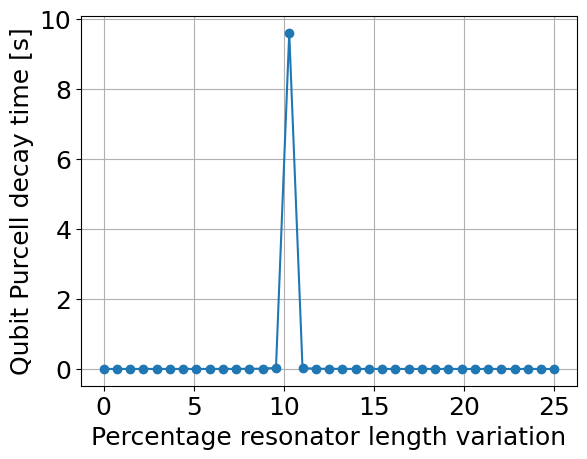

In [12]:
import matplotlib.pyplot as plt

plt.plot(variations*100, Tp, marker='o')
plt.xlabel('Percentage resonator length variation',fontsize='18')
plt.ylabel('Qubit Purcell decay time [s]',fontsize='18')
#plt.title('Qubit Purcell decay vs Resonator Length Variation')
plt.xticks(fontsize='18')
plt.yticks(fontsize='18')
plt.grid(True)
plt.show()

In [13]:
i=np.argmax(np.array(Tp))
l_final=l+l*variations[i]

net=[qu.C(0,1,Cj),qu.J(0,1,Lj),qu.C(1,2,Cg),qu.CPW(0,2,l_final),qu.C(2,3,Ck),qu.R(3,0,50)]
circuit_with_filter=qu.QCircuit(net,2,10)
circuit_with_filter.show_all()

print('Purcell decay time for the optimal resonator length: ', Tp[i], 's')

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  2.68e+00  | -3.48e-01 | -7.70e+03 |
|  2   |  5.46e+00  | -1.66e-08 | -3.29e+11 |
|  3   |  8.08e+00  | -3.14e+00 | -2.57e+03 |
+------+------------+-----------+-----------+
Chi matrix [MHz]:
+------+----------+----------+----------+
| Mode |    1     |    2     |    3     |
+------+----------+----------+----------+
|  1   | 9.39e-05 | 2.47e-01 | 2.09e-03 |
|  2   | 2.47e-01 | 1.63e+02 | 2.75e+00 |
|  3   | 2.09e-03 | 2.75e+00 | 1.16e-02 |
+------+----------+----------+----------+
Purcell decay time for the optimal resonator length:  9.597532503213579 s
